# *k*-NN Speedup in `scikit-learn`
`scikit-learn` contains two options to speed up neighbour retrieval for *k*-NN, `kd_tree` and `ball_tree`.  
There is also the option to use brute force search, i.e. linear search across all training data.  
Here we test the performance of these three options on four datasets from the UCI repository.  
The three methods return the same nearest neighbours so we only look at retrieval times.  

To run this notebook you will need to download the three data files and and .py file that loads the data:  
- `kNNDataLoader.py`
- `CC_default.csv`
- `HTRU_2.csv`
- `shuttle.csv`
- `letter-recognition.csv`  

These are all available in the git-hub repositiory. 

We test retrieval times under two scenarios, 10-fold cross validation and 2-fold cross validation.  
The two speed up alternatives have a preprocessing overhead where the trees are built, this overhead will have a bigger impact in 10-fold cross vaildation testing. 

In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time
import statistics
from sklearn import metrics
import kNNDataLoader
import matplotlib.pyplot as plt

In [9]:
Name_arr, X_dir, y_dir = kNNDataLoader.data_loader()
Name_arr

['Credit', 'HTRU', 'Shuttle', 'Letter']

## Analysis
Note: the evaluations entail cross-validation testing so those cells take a few minutes to run.

In [24]:
# Listing the datasets in this order produces nicer graphs. 
Name_arr = ['HTRU', 'Shuttle','Letter','Credit']
methods = ['brute','kd_tree', 'ball_tree', ]

In [12]:
md10 = {}
for m in methods:
    print(m)
    rd = {}
    for ds in Name_arr:
        print(ds)
        X = X_dir[ds]
        y = y_dir[ds]
        kNN = KNeighborsClassifier(n_neighbors=50, algorithm = m)
        t_start = time.time()
        scores = cross_val_score(kNN, X, y, cv=10)
        t = time.time()-t_start
        rd[ds]=t
        print(t)
    md10[m]=rd

brute
HTRU
9.8279869556427
Shuttle
65.85435700416565
Letter
12.838612079620361
Credit
22.4635808467865
kd_tree
HTRU
1.6481080055236816
Shuttle
34.7813458442688
Letter
14.130177021026611
Credit
66.75102376937866
ball_tree
HTRU
3.3973119258880615
Shuttle
52.797674894332886
Letter
19.528882026672363
Credit
70.35366916656494


In [13]:
md2 = {}
for m in methods:
    print(m)
    rd = {}
    for ds in Name_arr:
        print(ds)
        X = X_dir[ds]
        y = y_dir[ds]
        kNN = KNeighborsClassifier(n_neighbors=50, algorithm = m)
        t_start = time.time()
        scores = cross_val_score(kNN, X, y, cv=2)
        t = time.time()-t_start
        rd[ds]=t
        print(t)
    md2[m]=rd

brute
HTRU
4.648926019668579
Shuttle
33.069029808044434
Letter
6.3040478229522705
Credit
13.257880926132202
kd_tree
HTRU
1.6314280033111572
Shuttle
11.849361181259155
Letter
7.035146951675415
Credit
29.729572057724
ball_tree
HTRU
2.0143632888793945
Shuttle
13.227242946624756
Letter
5.585052967071533
Credit
17.484975814819336


In [14]:
xv2res = pd.DataFrame(md2)
xv10res = pd.DataFrame(md10)
xv10res

,brute,kd_tree,ball_tree
HTRU,9.827987,1.648108,3.397312
Shuttle,65.854357,34.781346,52.797675
Letter,12.838612,14.130177,19.528882
Credit,22.463581,66.751024,70.353669


In [19]:
a = xv2res.values
xv2res.iloc[:,0:3] = a[:,0:3]/a[:,0,None]
a = xv10res.values
xv10res.iloc[:,0:3] = a[:,0:3]/a[:,0,None]
xv10res

,brute,kd_tree,ball_tree
HTRU,1.0,0.167695,0.345677
Letter,1.0,1.100600,1.521105
Shuttle,1.0,0.528156,0.801734
Credit,1.0,2.971522,3.131899


In [20]:
xv2res = xv2res.sort_values('ball_tree')
xv10res = xv10res.sort_values('ball_tree')

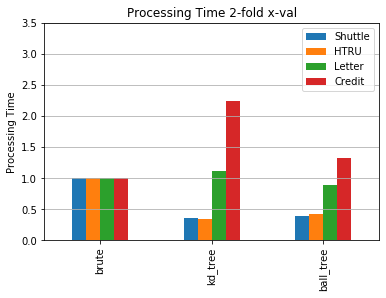

In [21]:
ax = xv2res.T.plot(kind ='bar')
ax.set_ylabel("Processing Time")
ax.set_title("Processing Time 2-fold x-val")
ax.set_ylim(0,3.5)
ax.grid('on', which='major', axis='y')

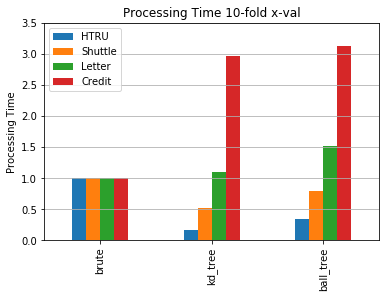

In [22]:
ax = xv10res.T.plot(kind ='bar')
ax.set_ylabel("Processing Time")
ax.set_title("Processing Time 10-fold x-val")
ax.set_ylim(0,3.5)
ax.grid('on', which='major', axis='y')